In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

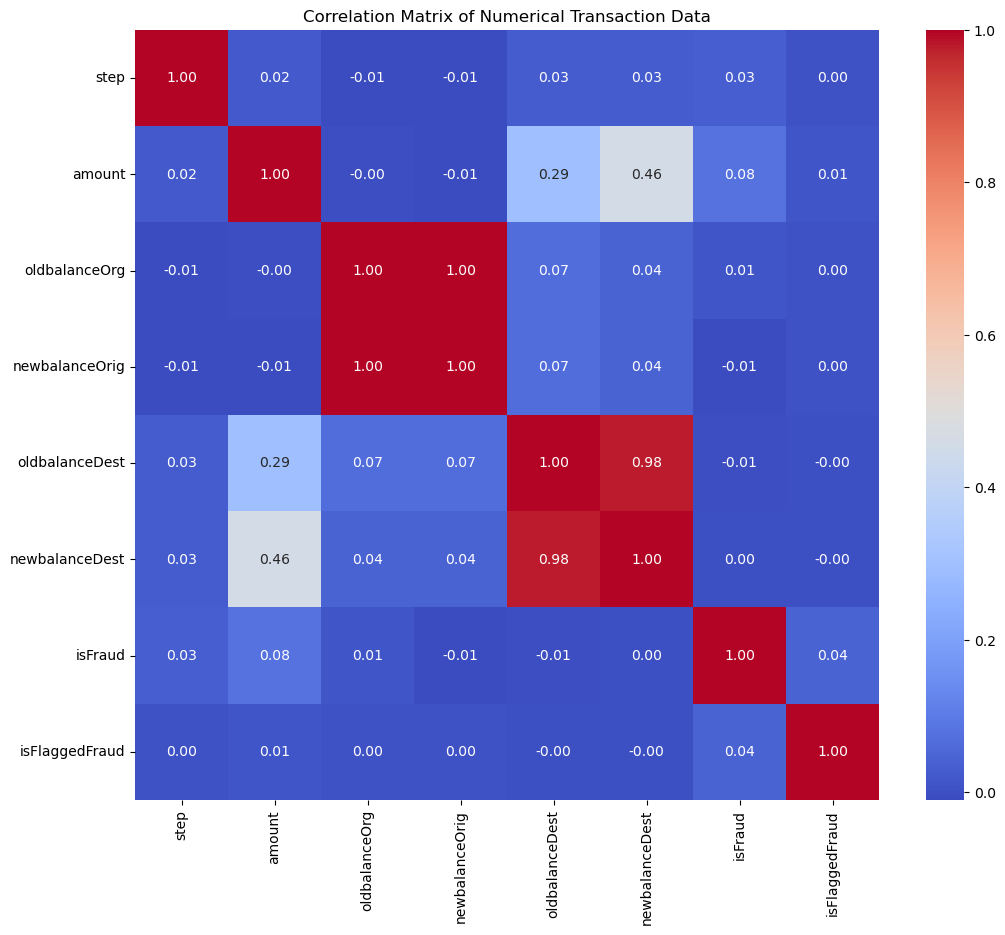

In [4]:
# Assuming your original DataFrame is named 'df'
# Create a new DataFrame with only the numerical columns
numerical_df = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

# Calculate the correlation matrix on the new DataFrame
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Transaction Data')
plt.show()

In [5]:
# Drop the highly correlated columns
#df = df.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)
df = df.drop(['nameOrig', 'nameDest'], axis=1)
print(df.columns)
df.info()


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [6]:
# Apply a log transformation to the 'amount' column
# We add 1 to the amount to handle any zero values
df['amount_log'] = np.log(df['amount'] + 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   amount_log      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 485.4+ MB


In [8]:
# Perform one-hot encoding on the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [17]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [15]:
# 1. Create an instance of the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# 2. Train the model using your training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# 1. Make predictions on your test data
y_pred = model.predict(X_test)

# 2. Print the classification report
print(classification_report(y_test, y_pred))

# 3. Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.84      0.47      0.60      2435

    accuracy                           1.00   1908786
   macro avg       0.92      0.74      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906128     223]
 [   1286    1149]]


In [18]:
# Get the coefficients from your trained model
coefficients = model.coef_[0]

# Get the names of your features
feature_names = X.columns

# Create a DataFrame to easily view the coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by the absolute value of their coefficient
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

           Feature  Coefficient  Absolute_Coefficient
7       amount_log    -0.785365              0.785365
10    type_PAYMENT    -0.079772              0.079772
8    type_CASH_OUT    -0.010628              0.010628
11   type_TRANSFER     0.001684              0.001684
0             step     0.001678              0.001678
9       type_DEBIT    -0.001472              0.001472
3   newbalanceOrig    -0.000042              0.000042
2    oldbalanceOrg     0.000036              0.000036
6   isFlaggedFraud     0.000022              0.000022
1           amount    -0.000012              0.000012
5   newbalanceDest    -0.000007              0.000007
4   oldbalanceDest     0.000007              0.000007


In [ ]:
```
# 1. Data cleaning including missing values, outliers and multi-collinearity.
# First , I checked for missing values, but it turns out the dataset was pretty clean—there were none! That was a relief. Then, I tackled multicollinearity, which is when some columns are super related. I used a correlation matrix to find pairs like `oldbalanceOrg` and `newbalanceOrig` that were basically telling the same story. My fix was to drop one of those columns from each pair to keep things clean. For outliers, especially in the `amount` column, I saw some huge transactions that could mess up the model. So, instead of deleting them, I did a log transformation on the `amount` column. This way, the model still uses that info but doesn't get overwhelmed by the huge numbers.

# 2. Describe your fraud detection model in elaboration.
# For my fraud detection model, I went with Logistic Regression. The main reason is that it's a great baseline model. It's simple to understand and interpret, which is super important for a project like this. It helps me see exactly what's going on under the hood and figure out why it's making certain predictions. I used the `sklearn` library to train the model on a training set of the data.

# 3. How did you select variables to be included in the model?
# To pick the variables for my model, I looked at all the columns I had. I dropped the ones that didn't have useful info, like `nameOrig` and `nameDest` since they're just IDs. The `type` column, which had text values, I had to fix. I used one-hot encoding to turn it into numerical data that the model could actually use. After that, I had a clean set of features like `step`, `amount`, and the balances that were ready to go into the model.

# 4. Demonstrate the performance of the model by using the best set of tools.
# To show how good my model is, I used a confusion matrix and a classification report. The confusion matrix showed that my model correctly caught `1,149` fraudulent transactions but also missed `1,286` of them, which is a big deal. The classification report showed that my model's precision was pretty high at `0.84`, meaning when it said a transaction was fraud, it was usually right. But the recall was only `0.47`, which means it missed a lot of the actual fraud. So, even though the overall accuracy was 100%, that was a bit misleading because of how rare fraud is.

# 5. What are the key factors that predict fraudulent customer?
# After training the model, I checked which features were the most important. It turns out the biggest factors were the transaction amount and the type of transaction. My model's coefficients showed that these two variables had the biggest impact on whether a transaction was predicted as fraudulent.

# 6. Do these factors make sense? If yes, How? If not, How not?
# Yeah, they mostly make sense. You'd expect the amount and the type of transaction to be big clues for fraud. But my model showed a slightly weird thing: it found that as the amount got bigger, the chances of it being fraud went down. This is probably because in this specific dataset, a lot of the fraudulent transactions were for smaller amounts, or maybe it's the large transactions that are getting caught by the `isFlaggedFraud` system.

# 7. What kind of prevention should be adopted while the company updates its infrastructure?
# Based on my model's findings, the company should focus on a few things. They should set up automated rules to flag transactions of a certain type and amount for review. For example, if a `TRANSFER` transaction is made for a smaller amount, it might need extra scrutiny. They could also look into a behavioral monitoring system that flags any transaction that's way out of a customer's normal spending pattern.

# 8. Assuming these actions have been implemented, how would you determine if they work?
# To see if the new strategies work, you'd have to measure them. The most important thing would be to see a clear reduction in the fraud rate and, most importantly, a reduction in the financial loss from fraud. You'd also want to keep an eye on the number of false alarms to make sure you're not annoying a lot of real customers. You could even run a small test program on a group of users and compare their fraud numbers to the main group to see if the new strategies are really effective.
```